In [1]:
import matplotlib.pyplot as plt
from nibabel.viewers import OrthoSlicer3D
import ismrmrd
import numpy as np
print(np.__version__)
import csv
import pandas as pd
import os
import sys

sys.path.append("../")
sys.path.append("/opt/mri4all/console/external")

import sigpy as sp

1.25.0


In [ ]:
'''Read the numpy files'''
file_yx = np.load('/vagrant/sample_files/axial_circshift_1yz.npy')
file_zx = np.load('/vagrant/sample_files/coronal_circshift_1zx.npy')
file_xy = np.load('/vagrant/sample_files/sagittal_circshift_1yx.npy')

sample_k_data = pd.read_csv('/vagrant/sample_files/data3.csv')
testdata = np.load('/vagrant/sample_files/test_data_kspace_d1s1.npy')

In [ ]:
sample_k_data
k_np = np.asarray(sample_k_data)
type(testdata)
testdata.shape

In [ ]:
# plt.figure()
# plt.imshow(np.abs(testdata[:,:,15]))
# plt.show()

# f = np.fft.fftshift(np.fft.fftn(np.fft.fftshift(testdata)))
# plt.figure()
# plt.imshow(np.abs(f[:,:,15]))
# plt.show()


s = sp.fft(testdata)
plt.figure()
plt.imshow(np.abs(s[:,:,15]))
plt.show()

In [ ]:
final_arr = np.expand_dims(testdata, axis=-1)
final_arr.shape
final_arr = sp.fft(final_arr)
# plt.figure()
# plt.imshow(np.abs(final_arr[:,:,15]))
# plt.show()
# te = 32
# for _ in range(te):
#     s = sp.fft(final_arr)

In [ ]:
final_arr[...,0]


In [ ]:
final_arr = np.empty_like(final_arr)
te = 4

'''Raise error if Ndim is not 3 or 4'''
if final_arr.ndim<3 or final_arr.ndim > 4 :
    print("Invalid shape of B0 data, expected 3 or 4 but got", np.ndim(final_arr))
elif final_arr.ndim==3:
    final_arr = np.expand_dims(final_arr, axis=-1)

for _ in range(final_arr.shape[-1]):
        slice_data = final_arr[:,:,:,_] 
        result = sp.fft(slice_data)
        np.append(final_arr, result)
        
final_arr.shape

In [ ]:
def fft(x):
    '''Computes the Fast Fourier Transform'''
    # s = np.fft.fftshift(np.fft.fftn(np.fft.fftshift(x, axes=(0,1,2)), axes=(0,1,2)), axes=(0,1,2))
    # f = np.fft.fftshift(np.fft.fftn(np.fft.fftshift(x)))
    s = sp.fft(x, norm='ortho')

    return s

def kspace2img(k_space):
    '''Reconstruct K-space data to image space takes in a 3D (or multislice 2D kspace)
    
    Parameters
    ----------
    k_space : numpy.ndarray
        K-space data in frequency domain
        
    Returns
    -------
    reconstructed_img : numpy.ndarray
        Reconstructed data in image domain'''
    
    reconstructed_img = fft(k_space)
    
    return reconstructed_img

In [ ]:
# read in numpy array that comes from the scanner
# initalise output_im = np.empty((100,100,100,100))
# check how many dimensions it has
        # for te = 1:num_echoes:
        #     output_im(TE,:) = kspace2img(numpy_array[TE,:])


# def final_recon(B0_corr):
#     '''Checks for the input dimensions and outputs final reconstructed image
    
#     Parameters
#     ----------
#     B0_corr : numpy.ndarray
#         B0_corrected data in frequency domain

#     te      : int
#         echotime
        
#     Returns
#     -------
#     final_arr : numpy.ndarray
#         Reconstructed data in image domain'''

#     '''Check the shape'''

shape=(5,5,2,2)
rand_k= np.random.normal(0, 1, size=shape)+1j*np.random.normal(0,1, size=shape)
# img = final_recon(rand_k)

B0_corr = rand_k
final_arr = np.empty_like(B0_corr)

'''Raise error if Ndim is not 3 or 4'''
if final_arr.ndim<3 or final_arr.ndim > 4 :
    print("Invalid shape of B0 data, expected 3 or 4 but got", np.ndim(B0_corr))
elif final_arr.ndim==3:
    final_arr = np.expand_dims(final_arr, axis=-1)

for _ in range(final_arr.shape[-1]):
    slice_data = final_arr[:,:,:,_] 
    fft_output = sp.fft(slice_data)
    np.append(final_arr, fft_output)
    # return final_arr

final_arr[:,:,:,1]


In [ ]:
shape=(5,5,2,2)
rand_k= np.random.normal(0, 1, size=shape)+1j*np.random.normal(0,1, size=shape)
img = final_recon(rand_k)

In [ ]:
img = ismrmrd.Image()
f = ismrmrd.Dataset('./testdata.h5', '/dataset', True)
print( f._file)

In [ ]:
'''K-Space to image space'''
def kspace2img(k_space):
    '''Reconstruct K-space data to image space'''
    reconstructed_img = np.fft.fftshift(np.fft.fftn(np.fft.fftshift(kspace)))
    return reconstructed_img


In [ ]:
img = kspace2img(kspace)
np.shape(img)


In [ ]:
# OrthoSlicer3D((np.abs(img))).show()
plt.figure()
plt.imshow(np.abs(img[:,:,15]))
plt.show()

In [8]:
k_2D_test=np.load('/vagrant/sample_files/kspace.npy')
np.shape(k_2D_test)


(250, 250)

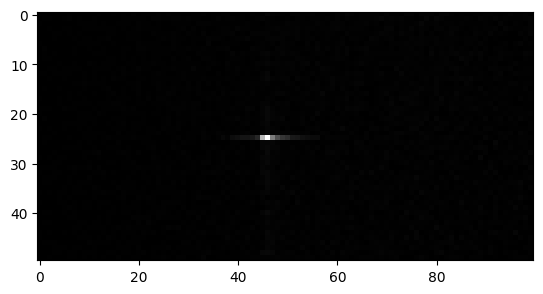

In [14]:
img = k_2D_test
recon_img = np.fft.fftshift(np.fft.fftn(np.fft.fftshift(img)))
# r = sp.fft(img)
plt.figure()
plt.imshow(np.abs(r[100:150, 50:150]), cmap='gray')
plt.show()

In [ ]:
    # if final_arr.ndim<3 or final_arr.ndim > 4 :
        # logging.error(f"Invalid shape of B0 data, expected 3 or 4 but got {np.ndim(k_space_B0_corr)}")

    # elif final_arr.ndim==3:
    #     final_arr = np.expand_dims(final_arr, axis=-1)
    
    # for _ in range(final_arr.shape[-1]):
    #     slice_data = final_arr[:,:,:,_] 
    #     fft_output = fft(slice_data)
    #     np.append(final_arr, fft_output)


def main():
    test_B0= np.load('/vagrant/sample_files/test_data_kspace_d1s1.npy')
    # test_B0= np.load('/vagrant/sample_files/kspace.npy')
    # print(test_B0.shape)
    img = final_recon(test_B0)

if __name__=='__main__':
    main()

In [19]:
a = recon_img
# a[[slice(0, 1[1]) for _ in a.shape]]
a = a[0:2]
np.shape(a)

(2, 250)